Title -

Boosting
a. Cross Validation
b. AdaBoost

Boosting is an ensemble learning technique that aims to improve the performance of weak learners (e.g., decision trees) by combining their predictions to create a strong learner. It is a sequential learning process where each weak learner is trained to focus on the samples that the previous learners found challenging. AdaBoost (Adaptive Boosting) is one of the popular boosting algorithms used for classification tasks. The provided Python code demonstrates how to use AdaBoost for classification, perform cross-validation to evaluate model performance, and analyze the impact of hyperparameters like the number of trees and learning rate.

a. Cross-Validation:
Cross-validation is a resampling technique used to evaluate machine learning models on limited data. It involves dividing the data into multiple subsets (folds), using some folds for training and the remaining for validation. In the code, cross_val_score from scikit-learn is used to perform 5-fold cross-validation on the AdaBoostClassifier. The cross-validation scores provide an estimate of the model's performance on unseen data.

b. AdaBoost:
AdaBoost is an iterative algorithm that assigns weights to data points based on their classification performance in previous iterations. It starts by assigning equal weights to all samples. In each iteration, it trains a weak learner and increases the weights of misclassified samples. The final model combines the weak learners' predictions, giving more weight to those with better performance.

The code uses the Iris dataset from scikit-learn, a popular dataset for classification tasks. The dataset consists of 150 samples of iris flowers, with four features each, and three target classes.

The AdaBoostClassifier is initialized with the number of estimators (50 weak learners) and learning rate (1). It is then trained on the training set using fit and evaluated on the test set using accuracy_score. The accuracy on the test set provides an estimate of how well the model generalizes to unseen data.

To analyze the impact of hyperparameters on AdaBoost's performance, the code plots the mean cross-validation scores with different numbers of trees and learning rates. The number of trees (n_estimators) controls the complexity of the model, and the learning rate adjusts the weights of the weak learners' contributions.

The first plot shows the mean cross-validation scores as the number of trees varies. As the number of trees increases, the model tends to perform better due to better learning from the data.

The second plot shows the mean cross-validation scores as the learning rate changes. A smaller learning rate makes the model learn slower, but it can lead to better generalization and avoid overfitting.

In conclusion, Boosting algorithms like AdaBoost are powerful tools for improving the accuracy of classification models by combining weak learners' predictions. Cross-validation is essential to assess the model's performance on unseen data and tune hyperparameters to achieve better results. By understanding the principles of boosting and experimenting with hyperparameters, practitioners can build robust and accurate classification models for various real-world applications.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.95238095 0.9047619  0.9047619  0.95238095 0.9047619 ]
Mean cross-validation score: 0.9238095238095239


In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test set accuracy:", accuracy)

Test set accuracy: 1.0


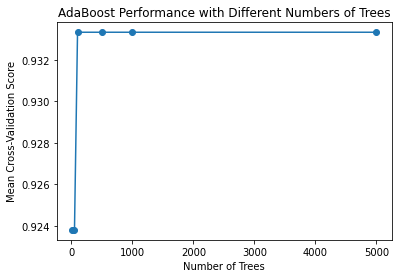

In [ ]:
#evaluate the performance of AdaBoost with different numbers of trees:

import numpy as np
import matplotlib.pyplot as plt

n_estimators_values = [10, 50, 100, 500, 1000, 5000]
cv_scores_mean = []

for n_estimators in n_estimators_values:
    clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=1, random_state=42)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_scores_mean.append(cv_scores.mean())

plt.plot(n_estimators_values, cv_scores_mean, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Cross-Validation Score')
plt.title('AdaBoost Performance with Different Numbers of Trees')
plt.show()

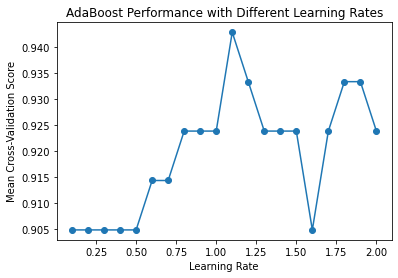

In [ ]:
#evaluate the performance of AdaBoost with different learning rates

learning_rates = np.linspace(0.1, 2, 20)
cv_scores_mean = []

for learning_rate in learning_rates:
    clf = AdaBoostClassifier(n_estimators=50, learning_rate=learning_rate, random_state=42)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_scores_mean.append(cv_scores.mean())

plt.plot(learning_rates, cv_scores_mean, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Cross-Validation Score')
plt.title('AdaBoost Performance with Different Learning Rates')
plt.show()